In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


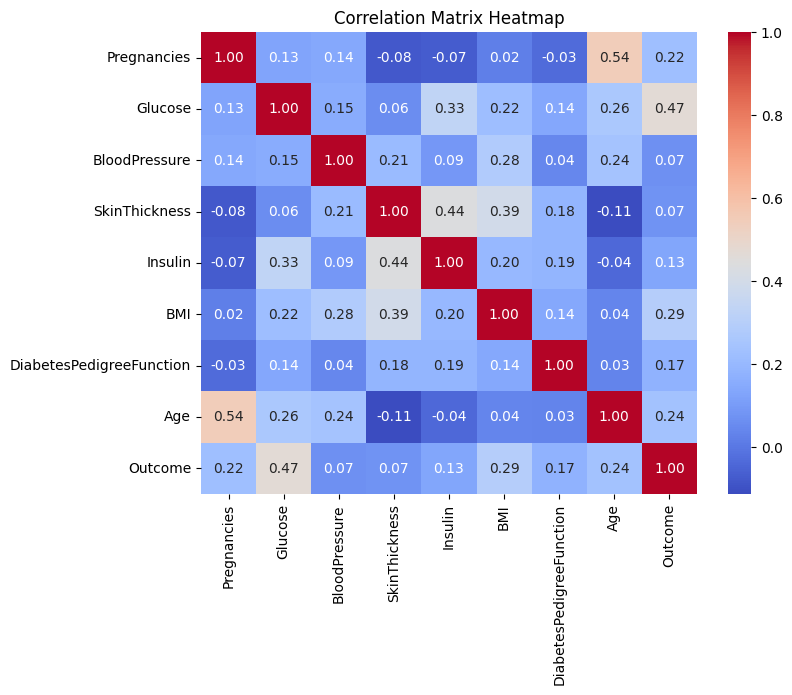

In [5]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [6]:
train,validation,test=np.split(data.sample(frac=1),[int(0.6*len(data)),int(0.8*len(data))])
test

/home/moundher/.local/lib/python3.10/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
456,1,135,54,0,0,26.7,0.687,62,0
676,9,156,86,0,0,24.8,0.230,53,1
240,1,91,64,24,0,29.2,0.192,21,0
326,1,122,64,32,156,35.1,0.692,30,1
532,1,86,66,52,65,41.3,0.917,29,0
...,...,...,...,...,...,...,...,...,...
173,1,79,60,42,48,43.5,0.678,23,0
638,7,97,76,32,91,40.9,0.871,32,1
151,4,114,65,0,0,21.9,0.432,37,0
478,8,126,74,38,75,25.9,0.162,39,0


In [7]:
coll=data.columns

In [8]:
scalle=StandardScaler()
x=scalle.fit_transform(train.iloc[:,:-1])
y=train.iloc[:,-1]
y = y.values.reshape(-1, 1)
t=np.hstack((x,y))
train=pd.DataFrame(t,columns=coll)
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.930638,0.086886,-0.020911,-1.294860,-0.696102,-0.060629,-0.674286,0.701335,0.0
1,-1.117040,-0.851623,-0.423810,-1.294860,-0.696102,0.462452,-0.659147,-0.670032,0.0
2,-0.202737,0.281060,0.180538,0.253049,0.954628,0.092468,0.206814,-0.498611,1.0
3,-0.812273,-0.236738,0.583437,1.491377,0.450721,0.398662,-0.798428,-0.755743,0.0
4,-0.507505,-0.819260,-0.020911,-0.180365,-0.035810,-0.724048,0.243149,-1.012874,0.0
...,...,...,...,...,...,...,...,...,...
455,0.406799,0.766495,0.482712,-1.294860,-0.696102,1.699984,-0.880179,1.215598,0.0
456,0.406799,0.345785,0.684162,-1.294860,-0.696102,0.947258,1.439144,0.358493,1.0
457,-0.507505,-0.430912,-0.222361,0.872213,0.337776,-0.149935,2.783504,0.101362,0.0
458,-0.812273,0.183973,0.079813,0.191133,0.259584,-0.940935,-0.786316,-0.670032,0.0


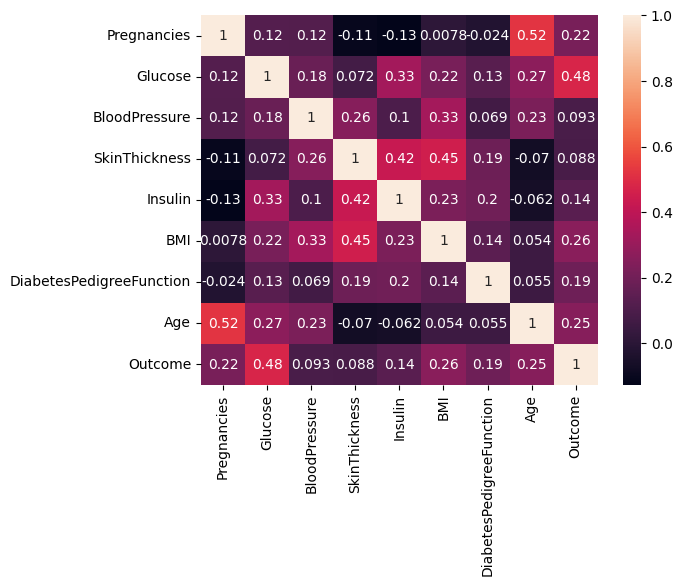

In [9]:
sns.heatmap(train.corr(),annot=True)
plt.show()

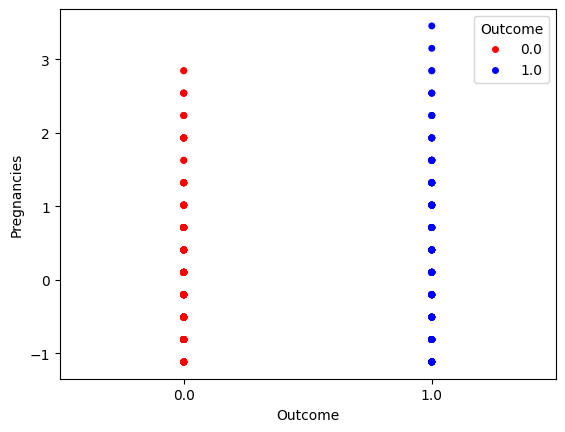

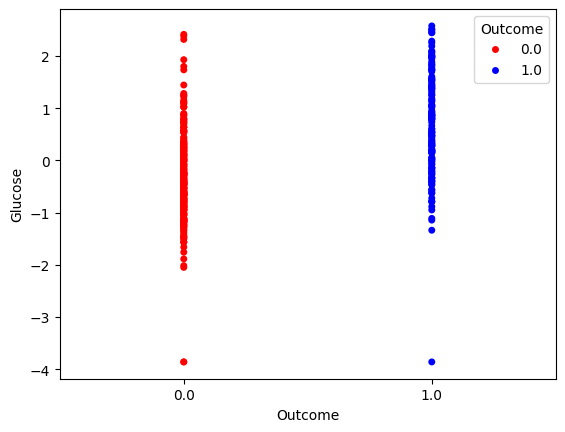

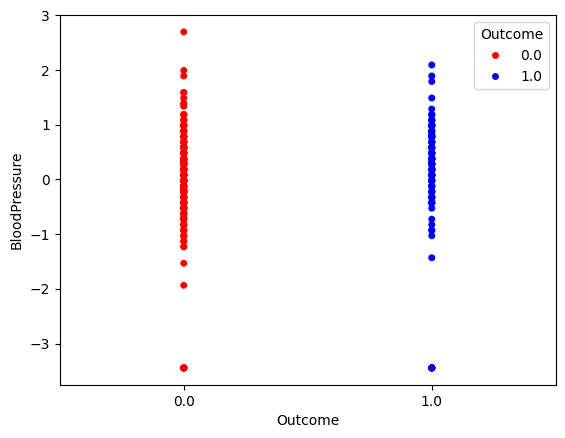

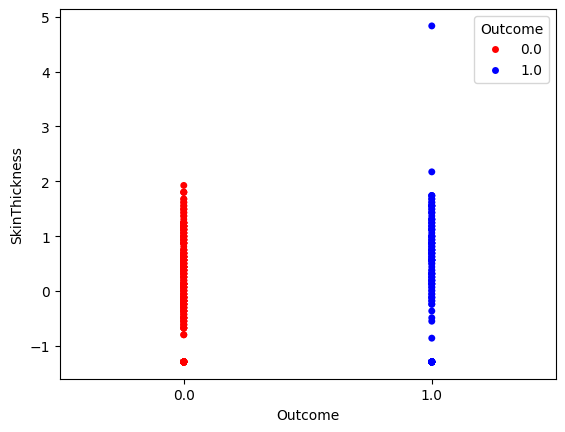

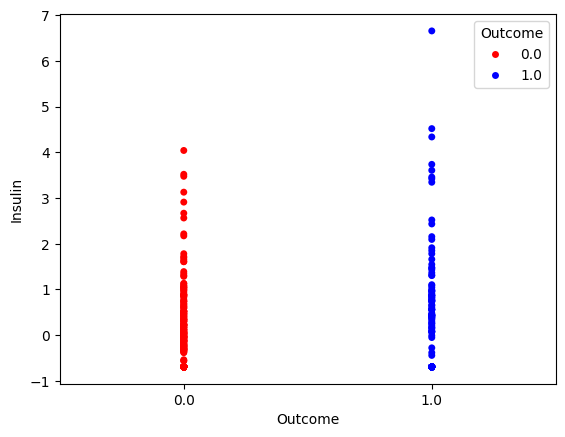

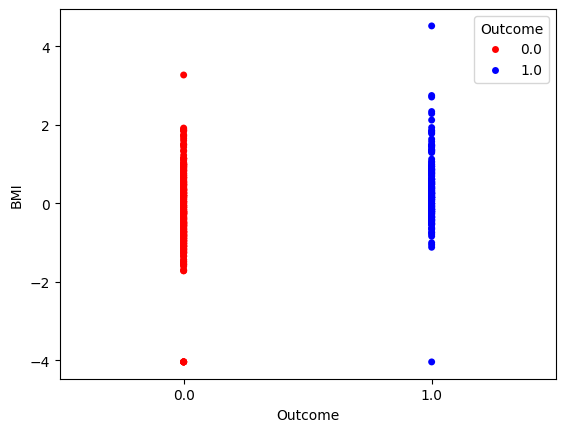

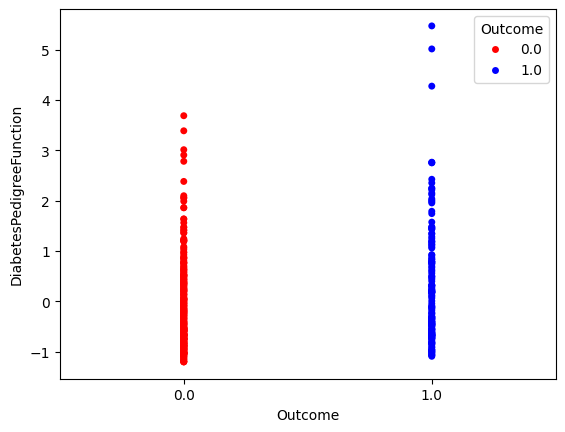

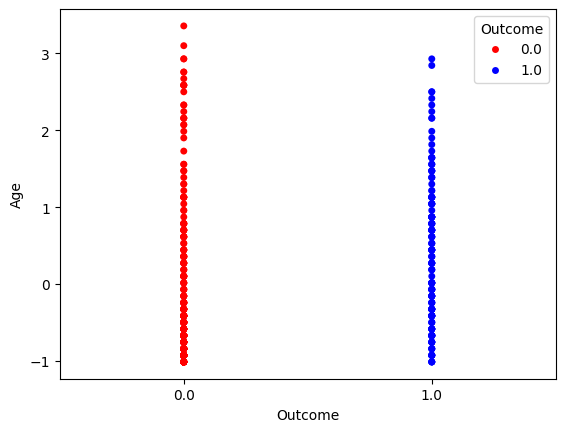

In [10]:
for i in coll[:-1]:
    sns.stripplot(y=i, x='Outcome', data=train, jitter=0, hue='Outcome',palette={0: 'red', 1: 'blue'})
    plt.show()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               460 non-null    float64
 1   Glucose                   460 non-null    float64
 2   BloodPressure             460 non-null    float64
 3   SkinThickness             460 non-null    float64
 4   Insulin                   460 non-null    float64
 5   BMI                       460 non-null    float64
 6   DiabetesPedigreeFunction  460 non-null    float64
 7   Age                       460 non-null    float64
 8   Outcome                   460 non-null    float64
dtypes: float64(9)
memory usage: 32.5 KB


In [12]:
print(len(train[train['Outcome']==1]))
print(len(train[train['Outcome']==0]))

160
300


In [13]:
train_set=train.iloc[:,:-1].values
targget_set=train['Outcome'].values


In [14]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_set,targget_set)

KNeighborsClassifier(n_neighbors=3)

In [15]:
sample=scalle.fit_transform(test.iloc[:,:-1])
y=test.iloc[:,-1].values.reshape((-1,1))
test=np.hstack((sample,y))
pd.DataFrame(test,columns=coll)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.853369,0.482220,-0.748874,-1.228559,-0.725903,-0.774106,0.956500,2.504468,0.0
1,1.427217,1.102299,0.886239,-1.228559,-0.725903,-1.034096,-0.764491,1.716814,1.0
2,-0.853369,-0.816994,-0.237901,0.270040,-0.725903,-0.432013,-0.907593,-1.083735,0.0
3,-0.853369,0.098361,-0.237901,0.769573,0.988686,0.375324,0.975329,-0.296081,1.0
4,-0.853369,-0.964632,-0.135706,2.018405,-0.011491,1.223712,1.822644,-0.383598,0.0
...,...,...,...,...,...,...,...,...,...
149,-0.853369,-1.171325,-0.442290,1.393989,-0.198337,1.524753,0.922607,-0.908701,0.0
150,0.857071,-0.639828,0.375266,0.769573,0.274274,1.168978,1.649415,-0.121046,1.0
151,0.001851,-0.137859,-0.186804,-1.228559,-0.725903,-1.430922,-0.003790,0.316539,0.0
152,1.142144,0.216472,0.273072,1.144222,0.098419,-0.883575,-1.020568,0.491574,0.0


In [18]:
from sklearn.metrics import classification_report

predict=model.predict(sample)
print(classification_report(predict,y))


              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84       105
         1.0       0.66      0.67      0.67        49

    accuracy                           0.79       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.79      0.79      0.79       154

